In [227]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
import warnings 
warnings.filterwarnings('ignore')
plt.style.use("ggplot")

In [228]:
df_data=pd.read_csv(r'D:\Project\new project\data\vitamin_deficiency_disease_dataset_20260123.csv')
df=df_data.copy()

In [229]:
df.head()

,age,gender,bmi,smoking_status,alcohol_consumption,exercise_level,diet_type,sun_exposure,income_level,latitude_region,...,has_night_blindness,has_fatigue,has_bleeding_gums,has_bone_pain,has_muscle_weakness,has_numbness_tingling,has_memory_problems,has_pale_skin,disease_diagnosis,has_multiple_deficiencies
0,79,Male,24.8,Former,NaN,Active,Vegetarian,High,High,Mid,...,0,0,0,0,0,0,0,0,Healthy,0
1,77,Female,39.9,Former,Moderate,Light,Omnivore,Low,Low,Low,...,0,0,0,1,0,0,0,0,Rickets_Osteomalacia,0
2,24,Male,26.4,Former,Heavy,Moderate,Omnivore,Low,High,High,...,1,0,0,0,0,0,0,0,Healthy,0
3,69,Male,23.1,Never,Heavy,Moderate,Vegetarian,High,Low,Low,...,0,0,0,0,0,1,1,0,Anemia,0
4,63,Male,29.6,Never,NaN,Moderate,Vegetarian,Moderate,High,Low,...,0,0,0,0,0,0,0,0,Healthy,0


In [230]:
df.shape

(4000, 34)

In [231]:
df.isnull().sum()

age                             0
gender                          0
bmi                             0
smoking_status                  0
alcohol_consumption          1278
exercise_level                  0
diet_type                       0
sun_exposure                    0
income_level                    0
latitude_region                 0
vitamin_a_percent_rda           0
vitamin_c_percent_rda           0
vitamin_d_percent_rda           0
vitamin_e_percent_rda           0
vitamin_b12_percent_rda         0
folate_percent_rda              0
calcium_percent_rda             0
iron_percent_rda                0
hemoglobin_g_dl                 0
serum_vitamin_d_ng_ml           0
serum_vitamin_b12_pg_ml         0
serum_folate_ng_ml              0
symptoms_count                  0
symptoms_list                1328
has_night_blindness             0
has_fatigue                     0
has_bleeding_gums               0
has_bone_pain                   0
has_muscle_weakness             0
has_numbness_t

In [232]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        4000 non-null   int64  
 1   gender                     4000 non-null   str    
 2   bmi                        4000 non-null   float64
 3   smoking_status             4000 non-null   str    
 4   alcohol_consumption        2722 non-null   str    
 5   exercise_level             4000 non-null   str    
 6   diet_type                  4000 non-null   str    
 7   sun_exposure               4000 non-null   str    
 8   income_level               4000 non-null   str    
 9   latitude_region            4000 non-null   str    
 10  vitamin_a_percent_rda      4000 non-null   float64
 11  vitamin_c_percent_rda      4000 non-null   float64
 12  vitamin_d_percent_rda      4000 non-null   float64
 13  vitamin_e_percent_rda      4000 non-null   float64
 14  vit

In [233]:
df[['has_night_blindness','has_fatigue',
    'has_bleeding_gums','has_bone_pain',
    'has_muscle_weakness','has_numbness_tingling',
    'has_memory_problems','has_pale_skin','has_multiple_deficiencies']]=df[['has_night_blindness','has_fatigue',
                                                'has_bleeding_gums','has_bone_pain',
                                                'has_muscle_weakness','has_numbness_tingling',
                                                'has_memory_problems','has_pale_skin','has_multiple_deficiencies']].replace({0:'No',1:'Yes'})

In [234]:
df.head()

,age,gender,bmi,smoking_status,alcohol_consumption,exercise_level,diet_type,sun_exposure,income_level,latitude_region,...,has_night_blindness,has_fatigue,has_bleeding_gums,has_bone_pain,has_muscle_weakness,has_numbness_tingling,has_memory_problems,has_pale_skin,disease_diagnosis,has_multiple_deficiencies
0,79,Male,24.8,Former,NaN,Active,Vegetarian,High,High,Mid,...,No,No,No,No,No,No,No,No,Healthy,No
1,77,Female,39.9,Former,Moderate,Light,Omnivore,Low,Low,Low,...,No,No,No,Yes,No,No,No,No,Rickets_Osteomalacia,No
2,24,Male,26.4,Former,Heavy,Moderate,Omnivore,Low,High,High,...,Yes,No,No,No,No,No,No,No,Healthy,No
3,69,Male,23.1,Never,Heavy,Moderate,Vegetarian,High,Low,Low,...,No,No,No,No,No,Yes,Yes,No,Anemia,No
4,63,Male,29.6,Never,NaN,Moderate,Vegetarian,Moderate,High,Low,...,No,No,No,No,No,No,No,No,Healthy,No


In [235]:
# percentage of null value in a column. To determine the column is required or not.
print(f'The percentage of null value in the column (alcohol_consumption) is {df['alcohol_consumption'].isnull().sum() / df.shape[0]*100}%')
print(f'The percentage of null value in the column (symptoms_list) is {df['symptoms_list'].isnull().sum() / df.shape[0]*100}%')

The percentage of null value in the column (alcohol_consumption) is 31.95%
The percentage of null value in the column (symptoms_list) is 33.2%


we require alcohol column because, it may infuences the model. But symptom list already exists in different individual columns. So, we are going to drop the sympotoms column

In [236]:
df.drop('symptoms_list', axis=1, inplace=True)

In [237]:
# imputing the categorical column with mode()
cat_col=df.select_dtypes(include='object')
for col in cat_col:
    if df[col].isnull().sum() == 0:
        df[col]=df[col].fillna(df[col].mode()[0])
    else:
        df

In [238]:
num_col=df.select_dtypes(include='number')
num_col

,age,bmi,vitamin_a_percent_rda,vitamin_c_percent_rda,vitamin_d_percent_rda,vitamin_e_percent_rda,vitamin_b12_percent_rda,folate_percent_rda,calcium_percent_rda,iron_percent_rda,hemoglobin_g_dl,serum_vitamin_d_ng_ml,serum_vitamin_b12_pg_ml,serum_folate_ng_ml,symptoms_count
0,79,24.8,119.1,147.3,152.88,97.5,102.5,188.9,108.3,97.4,13.5,39.3,356.4,23.3,0
1,77,39.9,85.7,57.5,32.76,82.7,62.6,51.0,42.6,102.5,15.4,8.9,303.0,5.3,1
2,24,26.4,48.3,152.1,94.99,169.3,136.2,116.6,136.3,86.4,14.1,29.9,578.0,16.3,2
3,69,23.1,75.8,51.0,51.48,85.7,31.8,66.5,76.5,60.8,12.3,20.2,144.8,9.2,2
4,63,29.6,93.3,111.5,62.90,155.6,72.6,124.9,69.4,71.9,15.1,20.7,348.2,13.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,25,21.6,41.4,66.1,111.50,99.8,72.8,77.0,142.0,72.9,15.3,34.8,346.7,9.2,1
3996,50,29.5,146.3,113.0,72.66,91.5,99.4,120.1,101.4,94.1,13.8,19.9,272.2,15.0,0
3997,34,24.8,77.0,39.8,76.10,43.2,41.6,62.7,43.9,53.7,13.4,21.4,100.0,4.8,3
3998,39,26.9,41.1,71.2,75.79,32.5,53.4,47.3,15.4,56.3,14.1,23.5,138.8,6.1,2


In [239]:
df.describe()

,age,bmi,vitamin_a_percent_rda,vitamin_c_percent_rda,vitamin_d_percent_rda,vitamin_e_percent_rda,vitamin_b12_percent_rda,folate_percent_rda,calcium_percent_rda,iron_percent_rda,hemoglobin_g_dl,serum_vitamin_d_ng_ml,serum_vitamin_b12_pg_ml,serum_folate_ng_ml,symptoms_count
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000
mean,50.766250,26.105325,90.770850,89.199075,72.216388,89.946125,62.743225,90.382275,82.586300,76.211125,14.027200,21.744050,255.514725,10.831725,1.86725
std,19.306237,4.922746,37.083534,37.505809,42.831000,37.444649,37.396636,37.563684,36.359131,33.226984,1.665629,13.768642,158.934806,4.965111,1.79581
min,18.000000,15.000000,10.000000,10.000000,7.000000,10.000000,10.000000,10.000000,10.000000,10.000000,8.200000,5.000000,100.000000,2.000000,0.00000
25%,34.000000,22.800000,62.600000,60.975000,40.730000,61.700000,32.700000,61.800000,55.600000,51.400000,12.900000,11.700000,121.200000,7.100000,0.00000
50%,51.000000,26.200000,85.500000,83.500000,62.270000,84.050000,55.600000,84.800000,77.100000,71.250000,14.100000,18.400000,214.850000,10.000000,2.00000
75%,67.000000,29.400000,115.300000,113.000000,93.317500,114.100000,84.500000,115.200000,105.300000,95.900000,15.100000,27.900000,338.400000,13.800000,3.00000
max,84.000000,45.000000,219.000000,250.000000,275.600000,237.600000,243.600000,226.600000,232.700000,211.400000,18.000000,80.000000,1138.100000,25.000000,9.00000


🔧 Step 1: Look at the Shape

Symmetric bell‑shaped curve → skew ≈ 0, kurtosis ≈ 3 (normal distribution).

Right‑skewed (long tail to the right) → positive skew (e.g., serum vitamin D, skew 1.43).

Left‑skewed (long tail to the left) → negative skew (e.g., hemoglobin, skew -0.15).

🔧 Step 2: Interpret Skewness

Skew ≈ 0 → fairly balanced (age, BMI).

Skew > 1 → highly skewed, may need transformation (log, square root).

Skew < -1 → strong left skew, also may need transformation.

👉 Example: has_bleeding_gums (skew 4.48) is extremely skewed — most people don’t have it, so the distribution is heavily imbalanced.

🔧 Step 3: Interpret Kurtosis

Kurtosis ≈ 0–3 → close to normal tails.

High kurtosis (>3) → heavy tails, more outliers (e.g., bleeding gums kurtosis 18.06).

Low kurtosis (<0) → light tails, fewer outliers (e.g., bone pain kurtosis -1.24).

👉 Example: serum_vitamin_d_ng_ml (kurtosis 2.39) → heavier tails, more extreme values.

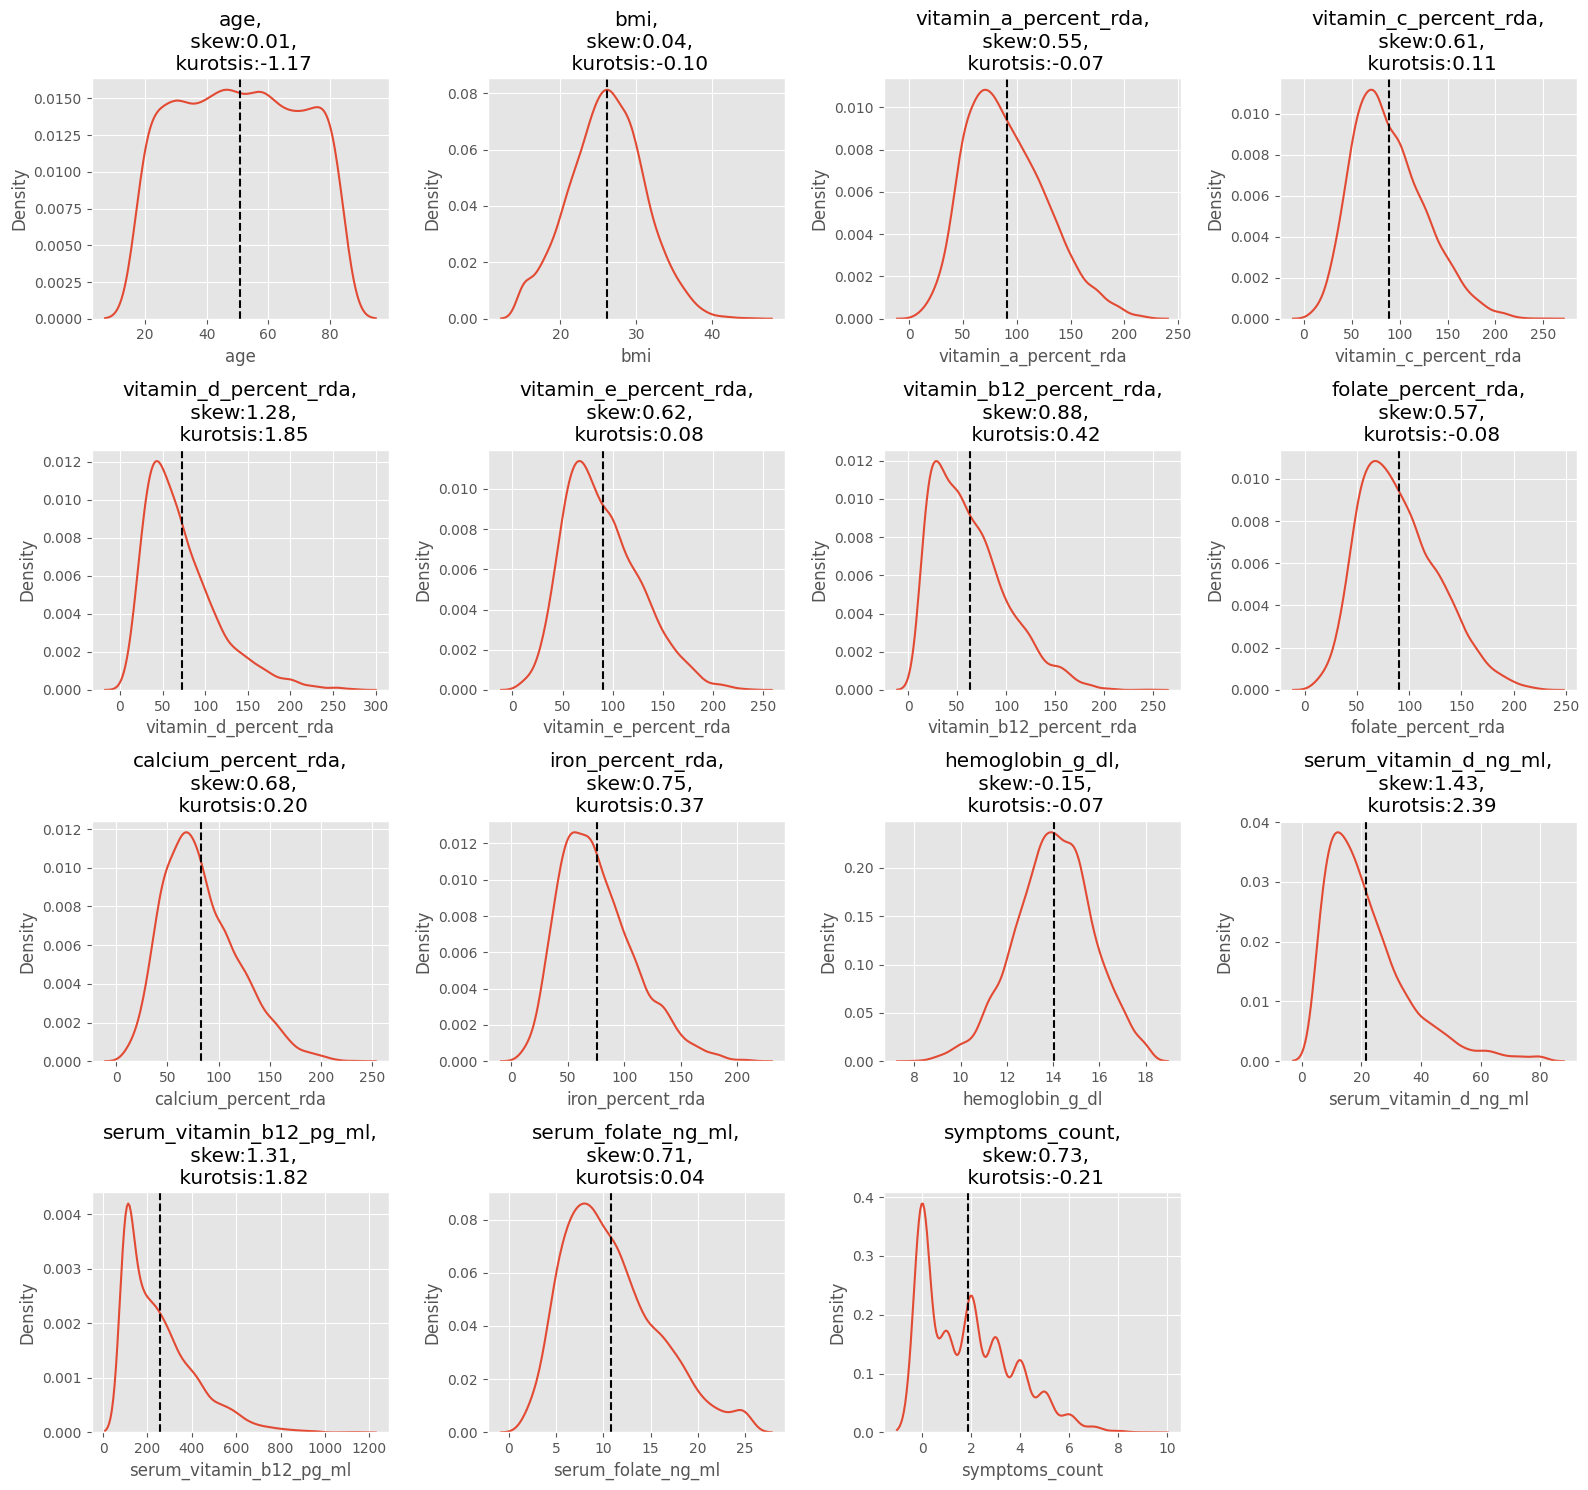

In [240]:
plt.rcParams['figure.figsize']=(16,15)
for i, col in enumerate(num_col.columns):
    plt.subplot(4,4,i+1)
    sns.kdeplot(num_col[col])
    plt.title(f'{col},\n skew:{num_col[col].skew():.2f},\n kurotsis:{num_col[col].kurtosis():.2f}')
    plt.axvline(num_col[col].mean(), linestyle='--', color='black')
plt.tight_layout()
plt.show()

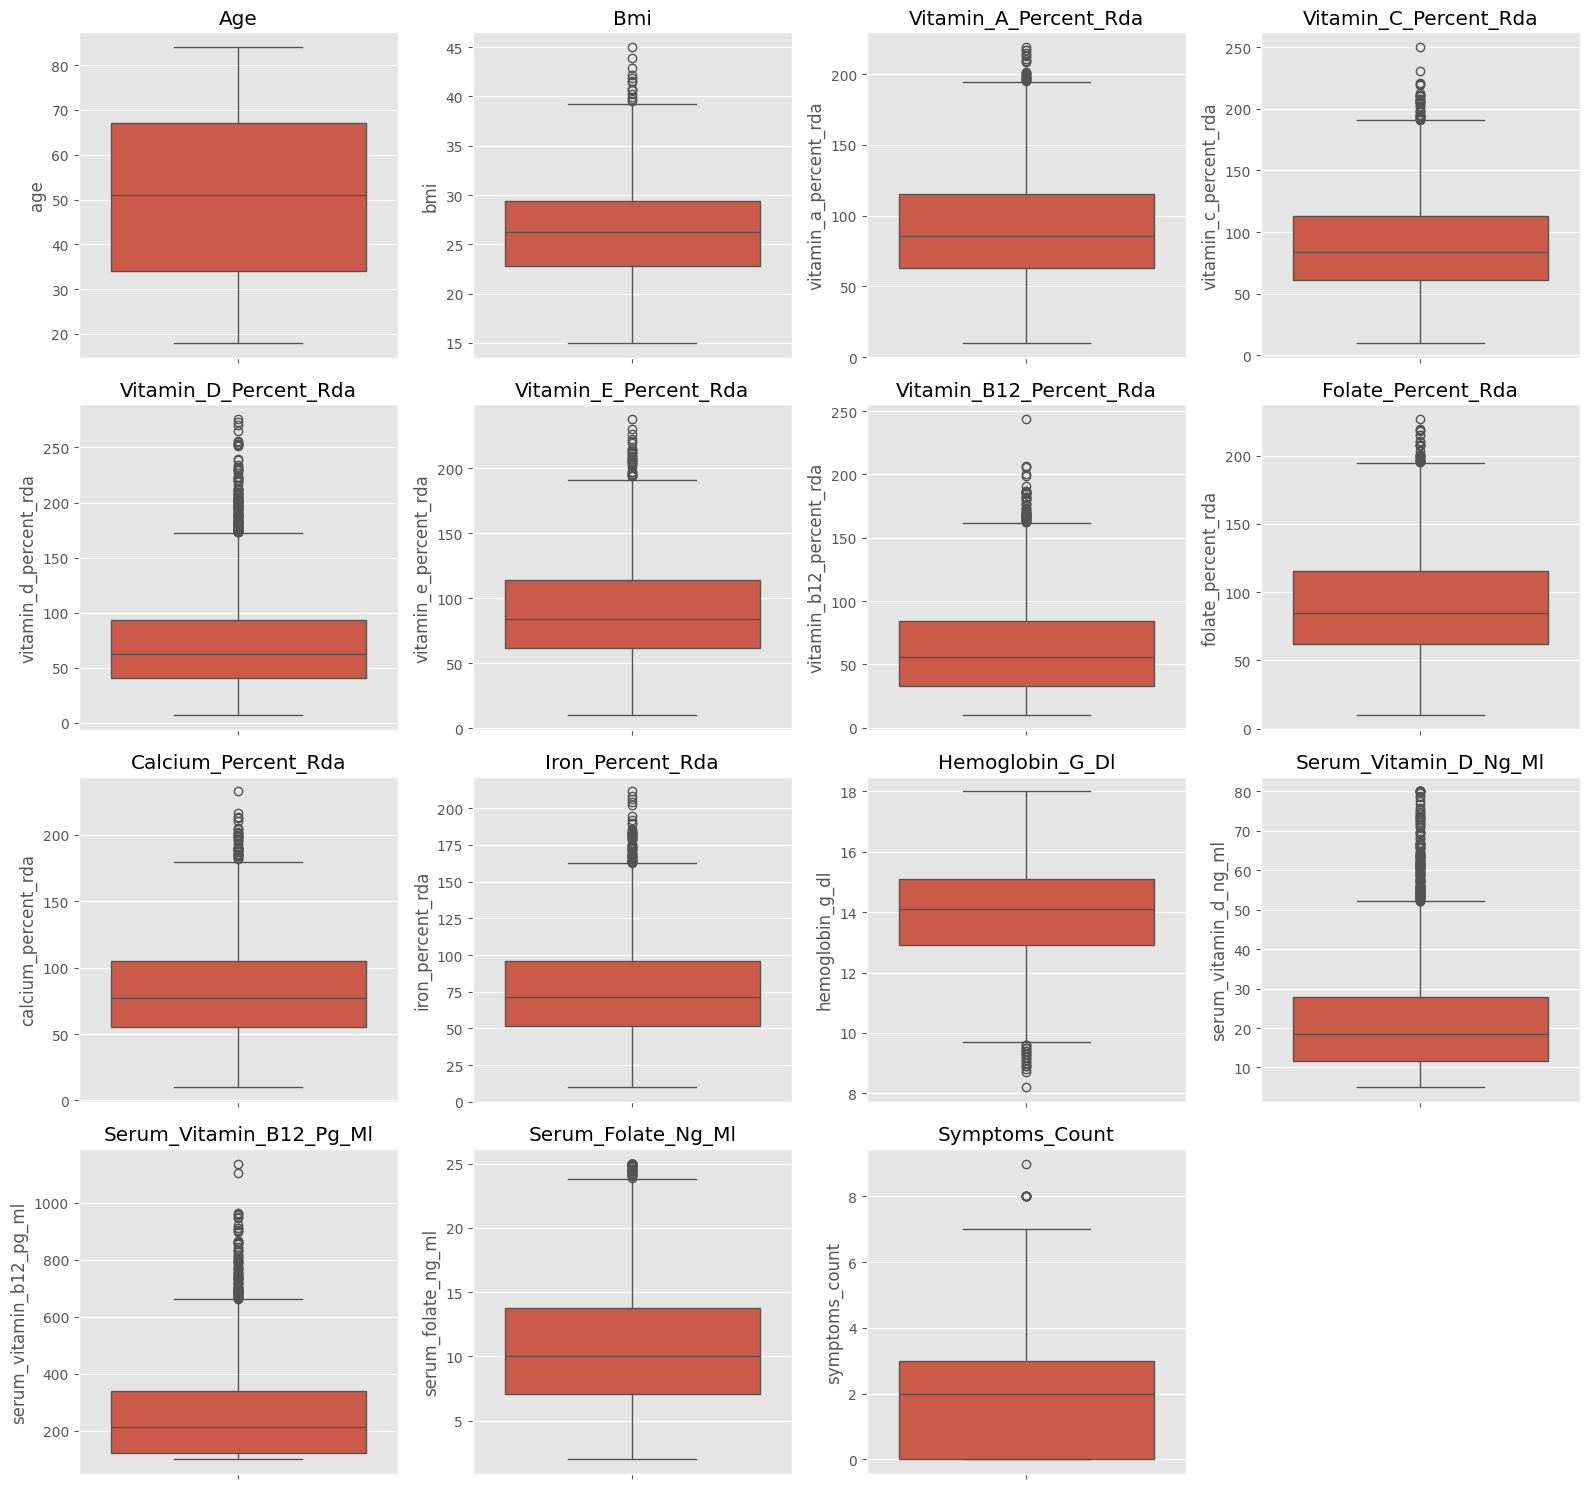

In [ ]:
plt.rcParams['figure.figsize']=(16,15)
for i, col in enumerate(num_col.columns):
    plt.subplot(4,4,i+1)
    sns.boxplot(num_col[col])
    plt.title(col.title())
plt.tight_layout()
plt.show()

<Axes: >

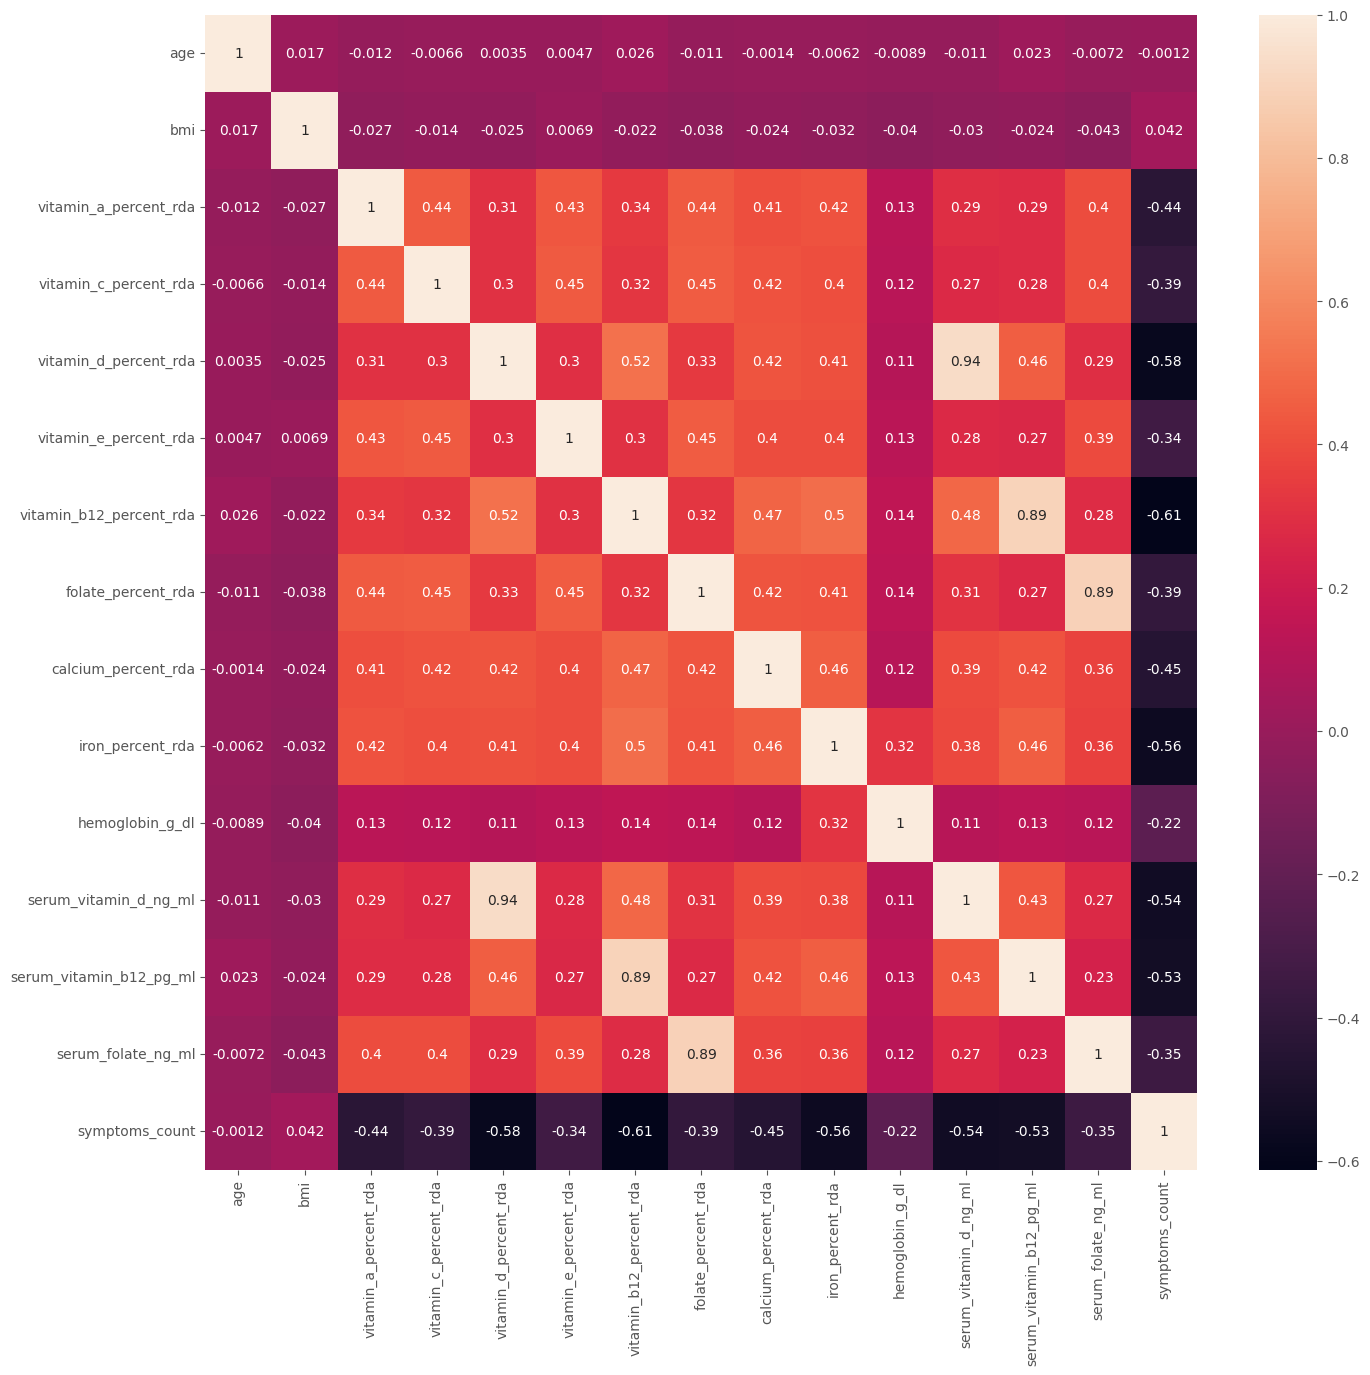

In [242]:
sns.heatmap(num_col.corr(), annot=True)

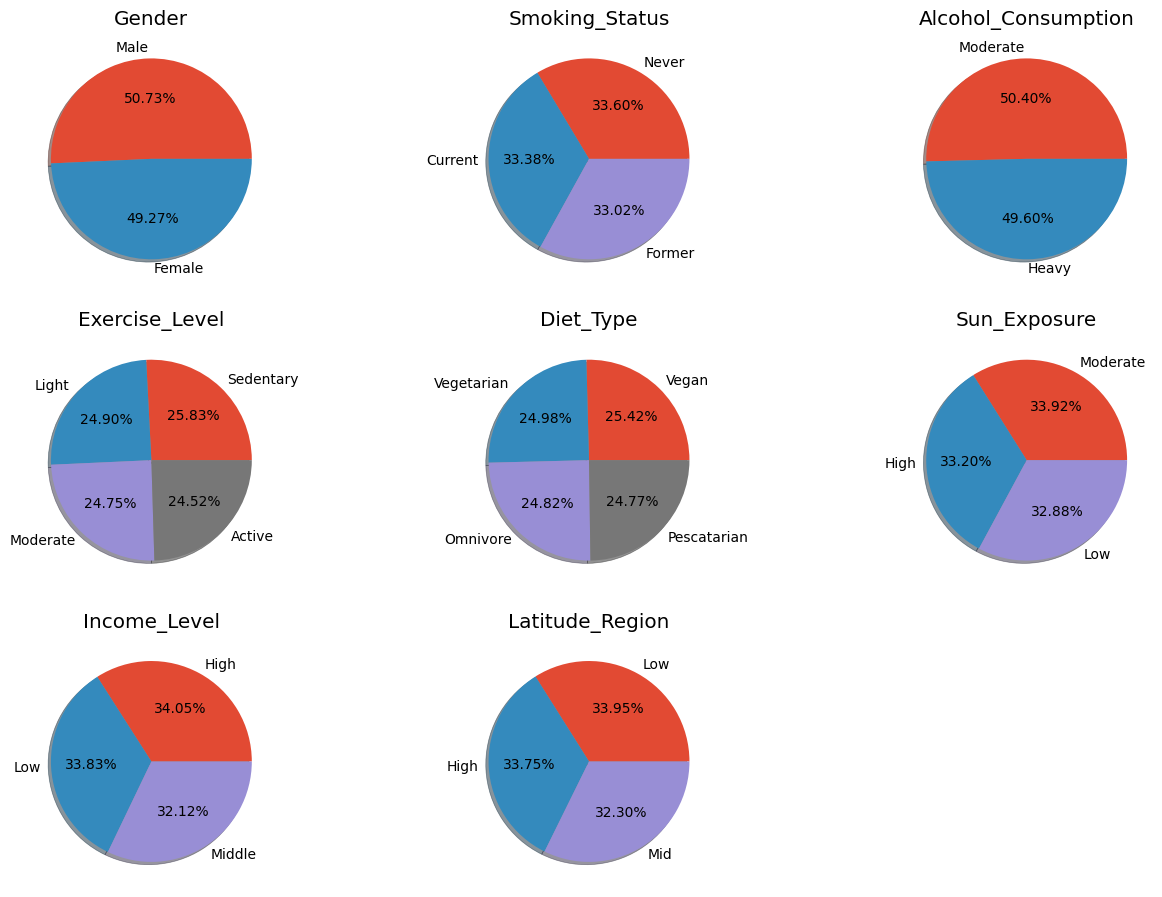

In [257]:
pie_chart=['gender','smoking_status','alcohol_consumption','exercise_level','diet_type','sun_exposure','income_level','latitude_region']
for i, col in enumerate(pie_chart):
    plt.subplot(4,3,i+1)
    plt.pie(df[col].value_counts(), autopct='%.2f%%', shadow=True, labels=df[col].value_counts().index)
    plt.title(col.title())

In [244]:
df.columns

Index(['age', 'gender', 'bmi', 'smoking_status', 'alcohol_consumption',
       'exercise_level', 'diet_type', 'sun_exposure', 'income_level',
       'latitude_region', 'vitamin_a_percent_rda', 'vitamin_c_percent_rda',
       'vitamin_d_percent_rda', 'vitamin_e_percent_rda',
       'vitamin_b12_percent_rda', 'folate_percent_rda', 'calcium_percent_rda',
       'iron_percent_rda', 'hemoglobin_g_dl', 'serum_vitamin_d_ng_ml',
       'serum_vitamin_b12_pg_ml', 'serum_folate_ng_ml', 'symptoms_count',
       'has_night_blindness', 'has_fatigue', 'has_bleeding_gums',
       'has_bone_pain', 'has_muscle_weakness', 'has_numbness_tingling',
       'has_memory_problems', 'has_pale_skin', 'disease_diagnosis',
       'has_multiple_deficiencies'],
      dtype='str')